# CLEAN DATA

##  ❊ Overview

<img src="https://upload.wikimedia.org/wikipedia/vi/a/ab/Titanic_3D_poster_Vietnam.jpg" width="300">

**Data dictionary**
 
| Variable | Definition | Key |
|:--:|:--:|:--:|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class, a proxy for socio-economic status (SES) | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Gender | |
| Age | Age in years | |
| sibsp | # of siblings(brother,sister)/spouses(husband, wife) aboard the Titanic |
| parch | # of parents/children aboard the Titanic. Some children travelled only with a nanny, therefore parch=0 for them |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C=Cherbourg, Q=Queenstown, S=Southampton |

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('data\\titanic_temp.xlsx')

In [128]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket2,Fare,Cabin,Embarked
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,SF.C. 12750,52.0000,B71,S
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,SC.A. 33595,15.7500,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,S347082,31.2750,NaN,S
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,C17421,110.8833,NaN,C
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,S11751,52.5542,D35,S


In [129]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  896 non-null    int64  
 1   Survived     896 non-null    int64  
 2   Pclass       896 non-null    int64  
 3   Name         896 non-null    object 
 4   Sex          869 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        896 non-null    int64  
 7   Parch        896 non-null    int64  
 8   Ticket2      896 non-null    object 
 9   Fare         896 non-null    float64
 10  Cabin        205 non-null    object 
 11  Embarked     834 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.1+ KB


##  1. Remove unwanted columns and Rename columns:

Not all the provided data is neccessary for the analysis, or in other words, able to answer the defined questions. It can be either that we only need certain number of columns certain number of rows. For example, sale data from 2009 to 2012 only, not the entire time. 


One of the early stage of data cleaning is to filter out those irrelavant data.  

The implementation on code is easy with `drop`. 

In [130]:
# Drop Cabin column:

In [131]:
# Drop multiple columns:
# df.drop(columns=['Cabin', 'Embarked'], inplace=True) # Cach 1


Change the name of specific column ▸ {old name: new name}

In [132]:
# Change 'Name' to 'PassengerName' and 'SibSp' to 'NumberSibling':


Change all the columns' names. Names must be in the same order with the columns. 

In [133]:
df2 = df.copy()

In [134]:
# Change all columns name of df2 to new name:['a', 'b', 'c', '1', '2', '3', '4', '5' , '6', '7', '8']


##  2. Check and change datatype

In [135]:
# Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  896 non-null    int64  
 1   Survived     896 non-null    int64  
 2   Pclass       896 non-null    int64  
 3   Name         896 non-null    object 
 4   Sex          869 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        896 non-null    int64  
 7   Parch        896 non-null    int64  
 8   Ticket2      896 non-null    object 
 9   Fare         896 non-null    float64
 10  Embarked     834 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 77.1+ KB


👉 `series.astype()` to convert datatype

In [136]:
# Use astype to change datatype of Fare column:


In [137]:
# Change passengerId to string:


## 3. Working with Missing Values

**▸ Sources of Missing Values**

Before we dive into code, it’s important to understand the sources of missing data. Here’s some typical reasons why data is missing:
- User forgot to fill in a field.
- Data was lost while transferring manually from a legacy database.
- There was a programming error.
- Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

As you can see, some of these sources are just simple random mistakes. Other times, there can be a deeper reason why data is missing.

**▸ Methods to work with Missing Values**

* Delete the case with missing observations. This is OK if this only causes the loss of a relatively small
number of cases. This is the simplest solution.
* Fill-in the missing value with mean, mode, median or other constant value.
* Use the rest of the data to predict the missing values by regression, KNN, ...

In Pandas, there are several useful methods for detecting, removing, and replacing null values:

* `isna()` or `isnull()`: Generate a boolean mask indicating missing values
* `notna()` or `notnull()`: Opposite of isnull()
* `dropna()`: Return a filtered version of the data
* `fillna()`: Return a copy of the data with missing values filled or imputed

**▸ Detecting null value**: Pandas data structures have two useful methods for detecting null data: `isnull()` and `notnull()`. Either one will return a Boolean mask over the data. For example:

**▸ Dropping null value**: In addition to the masking used before, there are convenient methods, `dropna()` (which removes NA values) and `fillna()` (which fills in NA values). The result is straightforward but be careful that you have to call `inplace=True` if you want to commit your change to the dataframe.

**Example on the dataset**

In [ ]:
df2 = df.copy()

In [139]:
# Check for null value


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex             27
Age            178
SibSp            0
Parch            0
Ticket2          0
Fare             0
Embarked        62
dtype: int64

#### Column `Sex`:

In [140]:
# Display the rows where Age is null


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket2,Fare,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",NaN,NaN,0,0,C2649,7.2250,C
20,21,0,2,"Fynney, Mr. Joseph J",NaN,35.0,0,0,S239865,26.0000,S
21,22,1,2,"Beesley, Mr. Lawrence",NaN,34.0,0,0,S248698,13.0000,S
23,24,1,1,"Sloper, Mr. William Thompson",NaN,28.0,0,0,S113788,35.5000,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",NaN,38.0,1,5,S347077,31.3875,S
26,27,0,3,"Emir, Mr. Farred Chehab",NaN,NaN,0,0,C2631,7.2250,C
27,28,0,1,"Fortune, Mr. Charles Alexander",NaN,19.0,3,2,S19950,263.0000,S
29,30,0,3,"Todoroff, Mr. Lalio",NaN,NaN,0,0,S349216,7.8958,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,NaN,1,0,CPC 17569,146.5208,C
33,34,0,2,"Wheadon, Mr. Edward H",NaN,66.0,0,0,SC.A. 24579,10.5000,S


🤔 Let's think! If others column can help to define passenger's name?

In [141]:
'bc' in 'abc xyz'

True

In [142]:
# We can use column "Name" to re-define customer gender:
# Option1: Using .apply()
def getGender(r):
    

df.loc[df['Sex'].isna(), 'Sex'] = df.apply(getGender, axis=1)

In [143]:
# Option2: Using .loc[] - series.str.contains()


#### Column `Age`

In [144]:
# Show null values in age column:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket2,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,Q330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,S244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,C2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,C2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,Q330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,SCA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,S345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,S349217,7.8958,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,SW./C. 6607,23.4500,S


In [112]:
# Fill Na by using .fillna()


In [113]:
# Fill age by using mean of each gender:



#### Column `Embarked`

In [114]:
# show null values in `Embarked` column:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket2,Fare,Embarked
109,110,1,3,"Moran, Miss. Bertha",female,27.988636,1,0,Q371110,24.1500,NaN
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.000000,0,0,S110465,52.0000,NaN
111,112,0,3,"Zabour, Miss. Hileni",female,14.500000,1,0,C2665,14.4542,NaN
112,113,0,3,"Barton, Mr. David John",male,22.000000,0,0,S324669,8.0500,NaN
113,114,0,3,"Jussila, Miss. Katriina",female,20.000000,1,0,S4136,9.8250,NaN
...,...,...,...,...,...,...,...,...,...,...,...
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.000000,0,0,CPC 17757,227.5250,NaN
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.000000,0,0,S34218,10.5000,NaN
718,719,0,3,"McEvoy, Mr. Michael",male,30.731652,0,0,Q36568,15.5000,NaN
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.000000,0,0,S347062,7.7750,NaN


In [115]:
# Get the first character of Ticket code: (series.str.slice(0,1))


In [124]:
df.iloc[107:114, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket2,Fare,Embarked
107,108,1,3,"Moss, Mr. Albert Johan",male,30.731652,0,0,S312991,7.7750,S
108,109,0,3,"Rekic, Mr. Tido",male,38.000000,0,0,S349249,7.8958,S
109,110,1,3,"Moran, Miss. Bertha",female,27.988636,1,0,Q371110,24.1500,Q
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.000000,0,0,S110465,52.0000,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.500000,1,0,C2665,14.4542,C
112,113,0,3,"Barton, Mr. David John",male,22.000000,0,0,S324669,8.0500,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.000000,1,0,S4136,9.8250,S


In [125]:
# Check quantity of null values again:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket2        0
Fare           0
Embarked       0
dtype: int64

##  4. Handling duplicated data

In [154]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket2,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,SA/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,CPC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,SSTON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S373450,8.0500,S


In [162]:
# Check for the whole duplicated rows - dataframe.duplicated().sum()


5

In [164]:
# Check for duplication for PassengerId only:


5

In [163]:
# Check duplicated each column:


PassengerId:  5
Survived:  894
Pclass:  893
Name:  5
Sex:  894
Age:  807
SibSp:  889
Parch:  889
Ticket2:  213
Fare:  648
Embarked:  892


In [165]:
# Show duplicated PassengerId rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket2,Fare,Embarked
891,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,S349217,7.8958,S
892,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,C11767,83.1583,C
893,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,S230433,26.0000,S
894,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,S349257,7.8958,S
895,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,S7552,10.5167,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket2,Fare,Embarked
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,S349217,7.8958,S
891,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,S349217,7.8958,S


In [168]:
# Drop PassengerId duplicated:


In [169]:
df.PassengerId.duplicated().sum()

0

## 5. Detect and handle outliers

One of the measure that describes how spread out the data is is the **Quantile**, which divides data into 4 equal quantiles. 

<img src='https://cdn.scribbr.com/wp-content/uploads/2020/09/iqr_quartiles.png'>

**Interquartiles Range**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png' width=400>



To identify the outliers, we follow 3 steps:

- ***Step 1***: Identify the Inter-quartiles Range 

    IQR = Q3 - Q1


- ***Step 2***: Calculate the lower whisker and upper whisker

    upper-whisker = Q3 + 1.5*IQR

    lower-whisker = Q1 - 1.5*IQR


- ***Step 3***: Identify the outliers. Data that is below the lower whisker or above the upper whisker will be considered to be outliers.

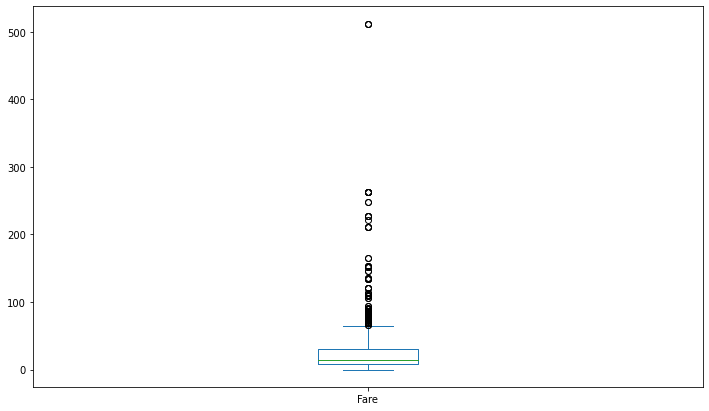

In [199]:
# Visualize with boxplot
df['Fare'].plot(kind='box', figsize=(12, 7));

In [139]:
# Calculate the quantiles -- Tính Q1 và Q3
q1 = df['Fare'].quantile(0.25) # Tính Q1
q3 = df['Fare'].quantile(0.75) # Tính Q3 

# Calculate the interquantile range
iqr = q3 - q1

# Calculate the whisker
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

🥸 **DISCUSSION: Given this upper and lower values. Which one is the right syntax to filter the data that in between the range of upper and lower?**

A/ ```df[lower < df['Fare'] < upper]```

B/ ```df[lower < df['Fare'] & df['Fare'] < upper]```

C/ ```df[(lower < df['Fare']) & (df['Fare'] < upper)]```

D/ ```df[(df['Fare'] < lower) & (df['Fare'] > upper)]```

In [142]:
# Normal


# Super rich kid


Xem tỉ lệ sống xót của các hành khách siêu giàu. Những hành khách trả siêu nhiều tiền 

Sex
female    0.926471
male      0.304348
Name: Survived, dtype: float64

Các hành khách siêu giàu đến từ những cảng nào

S    60
C    52
Q     2
Name: Embarked, dtype: int64

# SUMMARY:

1. Remove unwanted data:
    
    ```python
        .info() #check general information
        .describe() #statistically overview the column.
        .drop(columns=['A', 'B', 'C'], inplace=True) #drop columns
        .astype('int64') #cast the column to different datatype
        .rename(columns={'Name':'PassengerName', 'SibSp':'NumberSibling'}, inplace=True) #rename columns
         
         # Advanced
         pd.to_datetime(column) #cast the column to datetime datatype
    ```
2. Handling missing values:
    
    ```python
        .isna() # Detect nan values.
        .isnull()
        df['column'].isna().sum() # Count how many NaN are there in column
        df[df['column'].isna()] # display the rows where there is NaN values

        .fillna(0) # Fill NaN with 0
    ```

3. Handling duplication:
    
    ```python
        .duplicated() # Detect duplication
        df['column'].duplicated().sum() # Count how many duplication are there in column
        df[df['column'].duplicated()] # Choose duplicated rows
        df[~df['column'].duplicated()] # Choose non-duplicated rows.
    ```

4. Handling mislabeled and corrupted data:

    - Scan through each column, use `.info()`, `.describe()`, `value_counts()`, `unique()`, `nunique()`, etc to overview the column.
    - Use `.apply()`, `.str.replace()`, etc to edit the error. Or simply drop them.


5. Filter outliers using statistics.
    - Step 1: Calculate the IQR: IQR = Q3 - Q1
    - Step 2: Calculate whisker:

        upper_whisker = Q3 + 1.5*IQR

        lower_whisker = Q1 - 1.5*IQR
    - Step 3: Everything below the lower whisker or above the upper whisker is considered as outliers.
